In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

AmeEur='e'
S=75
T2=5
t1=0
r=0.07
q=0
b=r-q
k=0.03
m=1
sigma=0.2
F=100
X=100
Coupon=6
N=5

CRatio=F/X

OptionValue = np.zeros((N+1, N+1))
ConversionProbability = np.zeros((N+1, N+1))
StockPrice = np.zeros((N+1, N+1))  # create grid of numbers with both rows and columns

dt = T2/N

u = np.exp(sigma*np.sqrt(dt))
d = 1/u
p = (np.exp((r-q)*dt)-d)/(u-d)

# Build the Stock Price Tree
for i in range(N+1):
    for j in range(i+1):
        StockPrice[j, i] = S * (u**j) * (d**(i-j))

# Initialize Option Values and Conversion Probabilities
for i in range(N+1):
    OptionValue[i, N] = np.max([F + Coupon, CRatio * StockPrice[i, N]])
    if OptionValue[i, N] == F + Coupon:
        ConversionProbability[i, N] = 0
    else:
        ConversionProbability[i, N] = 1

CouponTime = T2

# Backward calculation for Option Value and Conversion Probability
for j in range(N-1, -1, -1):
    if CouponTime != (T2 - np.ceil((N-j+1) * dt)):
        CouponPayment = 1
        CouponTime = T2 - np.ceil((N-j) * dt)
        Time = CouponTime - dt * j
    else:
        CouponPayment = 0
    for i in range(j+1):
        ru = ConversionProbability[i+1, j+1] * r + (1 - ConversionProbability[i+1, j+1]) * (r + k)
        rd = ConversionProbability[i, j+1] * r + (1 - ConversionProbability[i, j+1]) * (r + k)
        if CouponPayment == 1:
            CouponValue = Coupon * (p * np.exp(-ru*Time) + (1-p) * np.exp(-rd*Time))
        else:
            CouponValue = 0
        OptionValue[i, j] = CouponValue + p * OptionValue[i+1, j+1] * np.exp(-ru*dt) + (1-p) * OptionValue[i, j+1] * np.exp(-rd*dt)
        ConversionProbability[i, j] = p * ConversionProbability[i+1, j+1] + (1-p) * ConversionProbability[i, j+1]


In [3]:
# Plotting function for binomial tree
def plot_binomial_tree(tree, title):
    steps = tree.shape[1] - 1
    G = nx.DiGraph()

    pos = {}
    labels = {}
    
    # Define the horizontal offset to center the nodes at each level
    for i in range(steps + 1):
        for j in range(i + 1):
            node = f"{i},{j}"
            G.add_node(node)
            pos[node] = (i, j - (i / 2))  # Adjust vertical position to center the tree
            labels[node] = f"{tree[j, i]:.2f}"

            if i < steps:
                G.add_edge(node, f"{i+1},{j}")
                G.add_edge(node, f"{i+1},{j+1}")

    # Plot
    plt.figure(figsize=(12, 6))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="black")
    plt.title(title)
    plt.show()

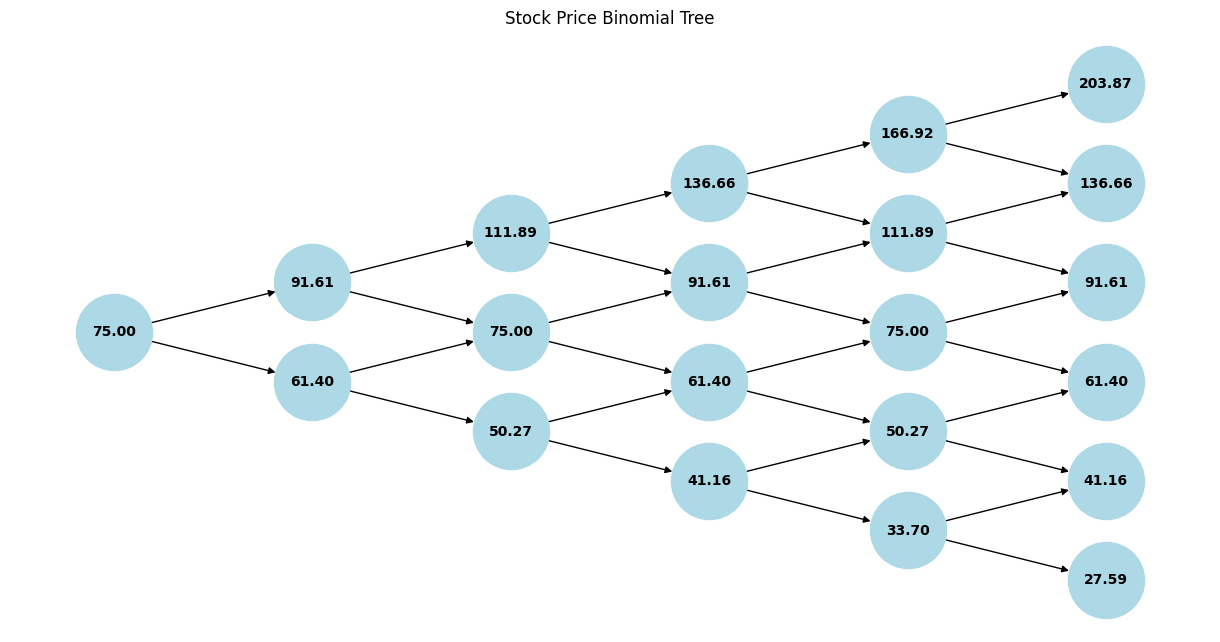

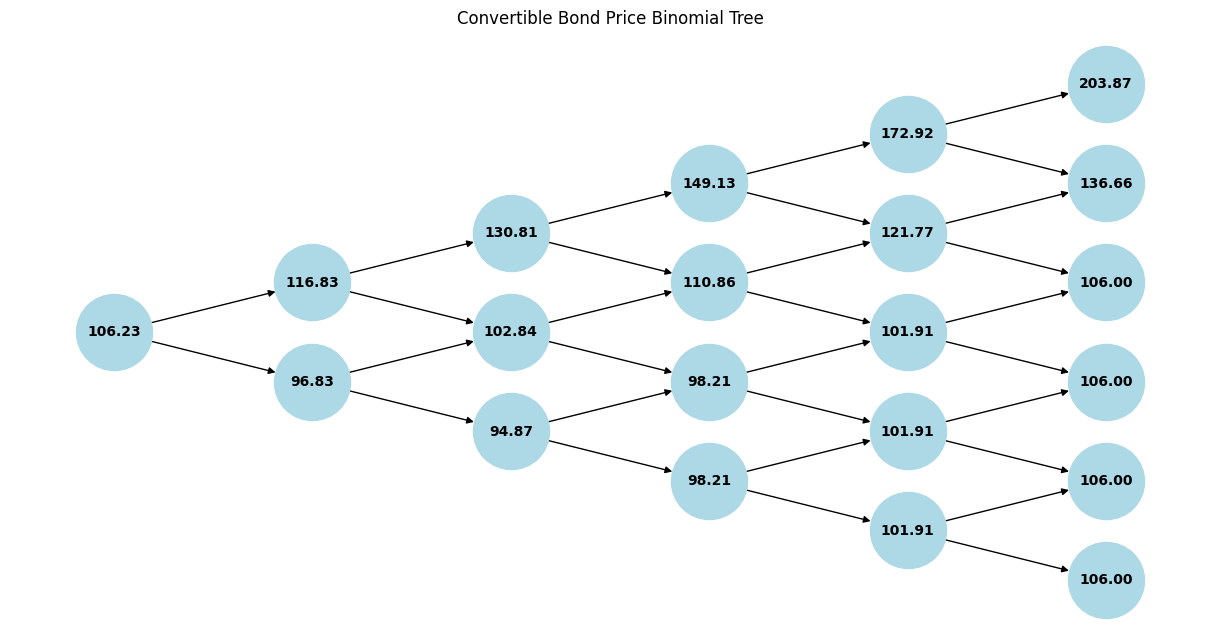

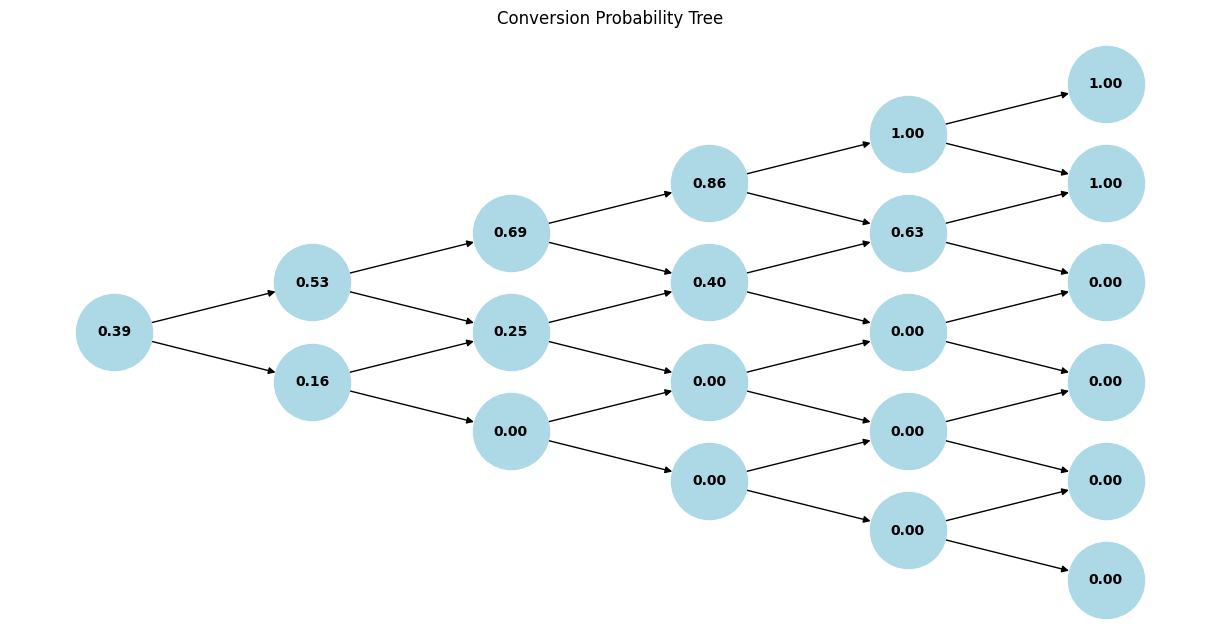

In [4]:
# Plot the stock price tree
plot_binomial_tree(StockPrice, "Stock Price Binomial Tree")

# Plot the bond price tree
plot_binomial_tree(OptionValue, "Convertible Bond Price Binomial Tree")

# Plot the conversion probability tree
plot_binomial_tree(ConversionProbability, "Conversion Probability Tree")